In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('TED_Preprocessed.csv')
df.head()

,video_link,duration,title,views,likes,comments,date,month,year,date_month_year,day
0,https://www.youtube.com//watch?v=FrqBWQ-mVEc,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,21/4/2022,Thu
1,https://www.youtube.com//watch?v=iIne-UO7wUo,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,20/4/2022,Wed
2,https://www.youtube.com//watch?v=5T2VRY0LECc,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,20/4/2022,Wed
3,https://www.youtube.com//watch?v=YRvf00NooN8,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,18/4/2022,Mon
4,https://www.youtube.com//watch?v=cdZZpaB2kDM,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,14/4/2022,Thu


In [96]:
del df['video_link']
del df['date_month_year']

df.head()

,duration,title,views,likes,comments,date,month,year,day
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu


#### 1. Analysing - Likes

In [97]:
print("Minimum : ", min(df['likes']))
print("Maximum : ", max(df['likes']))
print("Average : ", int(df['likes'].mean()))

Minimum :  36
Maximum :  1600000
Average :  11027


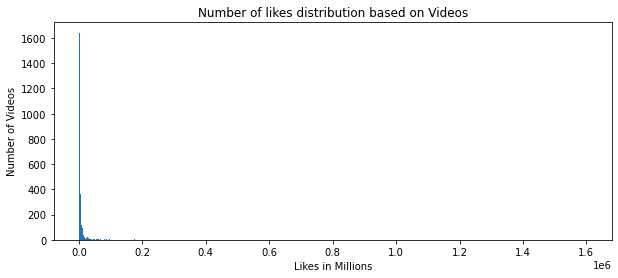

In [98]:
fig ,ax = plt.subplots(figsize = (10,4))

ax.hist(df['likes'], bins = 1000)

plt.title('Number of likes distribution based on Videos')

plt.xlabel('Likes in Millions')
plt.ylabel('Number of Videos')

plt.show()

#### 2. Analysing - Views

In [99]:
print("Minimum : ", min(df['views']))
print("Maximum : ", max(df['views']))
print("Average : ", int(df['views'].mean()))

Minimum :  5699
Maximum :  47561789
Average :  576490


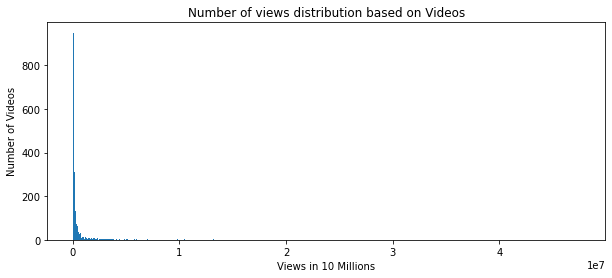

In [100]:
fig ,ax = plt.subplots(figsize = (10,4))

ax.hist(df['views'], bins = 1000)

plt.title('Number of views distribution based on Videos')

plt.xlabel('Views in 10 Millions')
plt.ylabel('Number of Videos')

plt.show()

#### 3. Analysing - Comments

In [101]:
print("Minimum : ", min(df['comments']))
print("Maximum : ", max(df['comments']))
print("Average : ", int(df['comments'].mean()))

Minimum :  2
Maximum :  127586
Average :  829


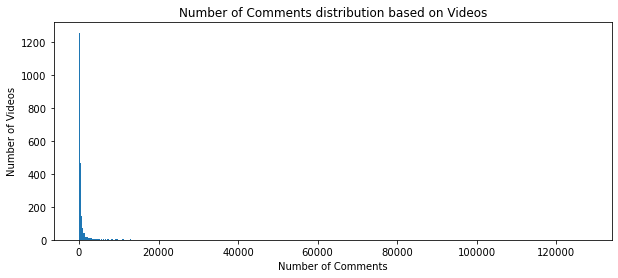

In [102]:
fig ,ax = plt.subplots(figsize = (10,4))

ax.hist(df['comments'], bins = 1000)

plt.title('Number of Comments distribution based on Videos')

plt.xlabel('Number of Comments')
plt.ylabel('Number of Videos')

plt.show()

#### 4. Finding Correlation from Scratch

In [103]:
factor = []

for i in df.values:    
    factor.append(round(i[3]/i[2],5))          # i[2] = Views, i[3] = likes
    
df['view_to_like'] = factor

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_like
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.02632
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.02610


In [104]:
print("Minimum : ", min(df['view_to_like']))
print("Maximum : ", max(df['view_to_like']))

Minimum :  0.00042
Maximum :  0.07977


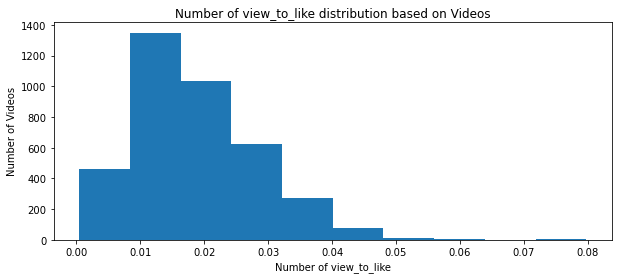

In [105]:
fig ,ax = plt.subplots(figsize = (10,4))

ax.hist(df['view_to_like'], bins = 10)

plt.title('Number of view_to_like distribution based on Videos')

plt.xlabel('Number of view_to_like')
plt.ylabel('Number of Videos')

plt.show()

#### 5. Adding Predicted Likes Column

In [106]:
likes = []

for i in df['views']:
    likes.append(int(i * .01388))
    
df['pred_likes'] = likes

df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_like,pred_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706,711
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387,355
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954,297
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.02632,50105
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.02610,61148


#### 6. Correlation b/w Likes and Views

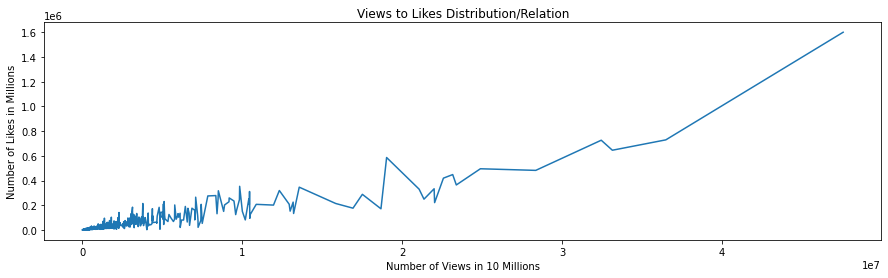

In [143]:
data = []

for i in df.values:
    data.append([i[2],i[3]])
    
df_ = pd.DataFrame(data, columns = ['views','likes'])

views = list(df_.sort_values(by = 'views')['views'])
likes = list(df_.sort_values(by = 'views')['likes'])

fig, ax = plt.subplots(figsize = (15,4))

ax.plot(views,likes)

plt.xlabel("Number of Views in 10 Millions")
plt.ylabel('Number of Likes in Millions')

plt.title('Views to Likes Distribution/Relation')

plt.show()

### Conclusion : There is very positive Correlation between Likes and Views

#### 7. Correlation b/w Views and Comments

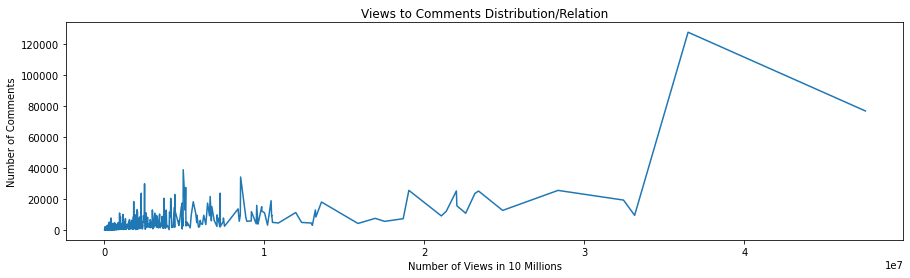

In [157]:
data = []

for i in df.values:
    data.append([i[2],i[4]])
    
df_ = pd.DataFrame(data, columns = ['views','comments'])

views    = list(df_.sort_values(by = 'views')['views'])
comments = list(df_.sort_values(by = 'views')['comments'])

fig, ax = plt.subplots(figsize = (15,4))

ax.plot(views,comments)

plt.xlabel("Number of Views in 10 Millions")
plt.ylabel('Number of Comments')

plt.title('Views to Comments Distribution/Relation')

plt.show()

### Conclusion : There is positive Correlation between Comments and Views

#### 8. Correlation b/w Likes and Comments

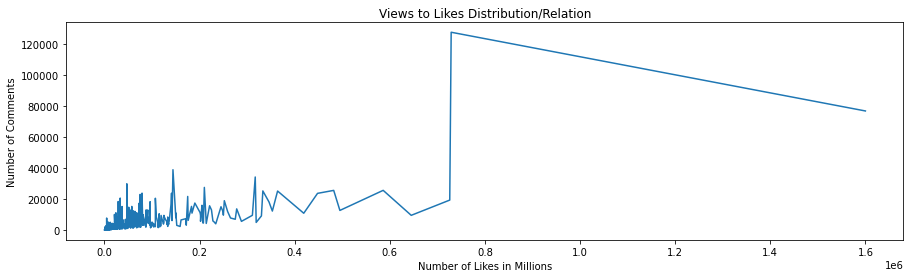

In [159]:
data = []

for i in df.values:
    data.append([i[3],i[4]])
    
df_ = pd.DataFrame(data, columns = ['likes','comments'])

likes    = list(df_.sort_values(by = 'likes')['likes'])
comments = list(df_.sort_values(by = 'likes')['comments'])

fig, ax = plt.subplots(figsize = (15,4))

ax.plot(likes,comments)

plt.xlabel("Number of Likes in Millions")
plt.ylabel('Number of Comments')

plt.title('Views to Likes Distribution/Relation')

plt.show()

### Conclusion : There is positive Correlation between Likes and Comments

#### 9. Correlation b/w Views to Date

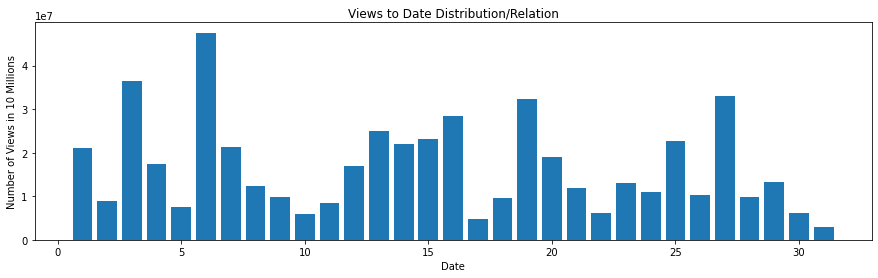

In [165]:
data = []

for i in df.values:
    data.append([i[2],i[5]])
    
df_ = pd.DataFrame(data, columns = ['views','date'])

views    = list(df_.sort_values(by = 'date')['views'])
date     = list(df_.sort_values(by = 'date')['date'])

fig, ax = plt.subplots(figsize = (15,4))

ax.bar(date,views)

plt.xlabel("Date")
plt.ylabel('Number of Views in 10 Millions')

plt.title('Views to Date Distribution/Relation')

plt.show()

### Conclusion : No Corelation

#### 10. Correlation b/w Views to Month

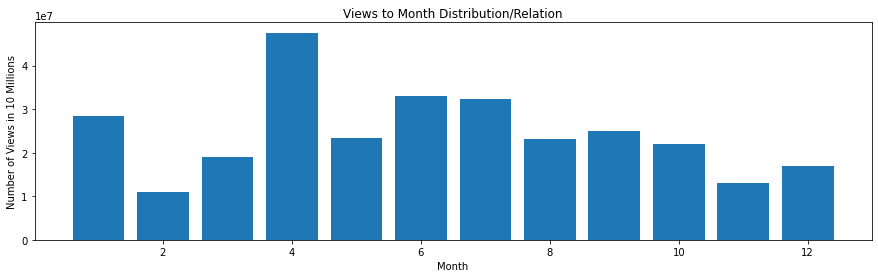

In [169]:
data = []

for i in df.values:
    data.append([i[2],i[6]])
    
df_ = pd.DataFrame(data, columns = ['views','month'])

views    = list(df_.sort_values(by = 'month')['views'])
month    = list(df_.sort_values(by = 'month')['month'])

fig, ax = plt.subplots(figsize = (15,4))

ax.bar(month,views)

plt.xlabel("Month")
plt.ylabel('Number of Views in 10 Millions')

plt.title('Views to Month Distribution/Relation')

plt.show()

### Conclusion : No Corelation

#### 11. Correlation b/w Views to Year

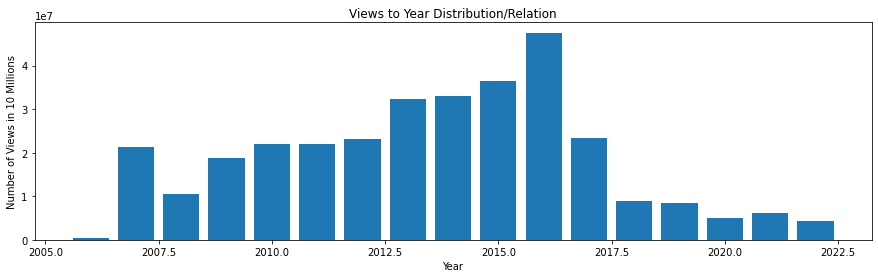

In [172]:
data = []

for i in df.values:
    data.append([i[2],i[7]])
    
df_ = pd.DataFrame(data, columns = ['views','year'])

views    = list(df_.sort_values(by = 'year')['views'])
year     = list(df_.sort_values(by = 'year')['year'])

fig, ax = plt.subplots(figsize = (15,4))

ax.bar(year,views)

plt.xlabel("Year")
plt.ylabel('Number of Views in 10 Millions')

plt.title('Views to Year Distribution/Relation')

plt.show()

#### 12. Correlation b/w Views to Day

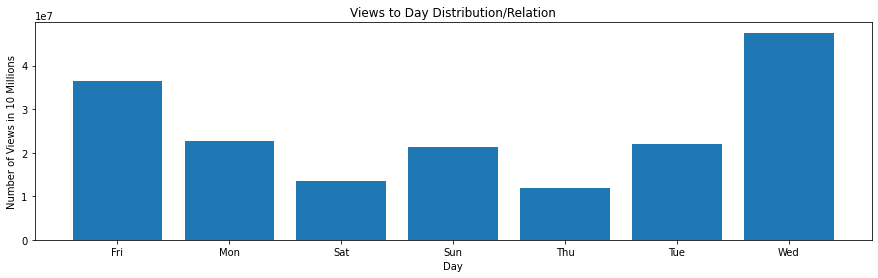

In [177]:
data = []

for i in df.values:
    data.append([i[2],i[8]])
    
df_ = pd.DataFrame(data, columns = ['views','day'])

views    = list(df_.sort_values(by = 'day')['views'])
day      = list(df_.sort_values(by = 'day')['day'])

fig, ax = plt.subplots(figsize = (15,4))

ax.bar(day,views)

plt.xlabel("Day")
plt.ylabel('Number of Views in 10 Millions')

plt.title('Views to Day Distribution/Relation')

plt.show()

#### 13. Correlation b/w Views & [Likes, Predicted Likes]

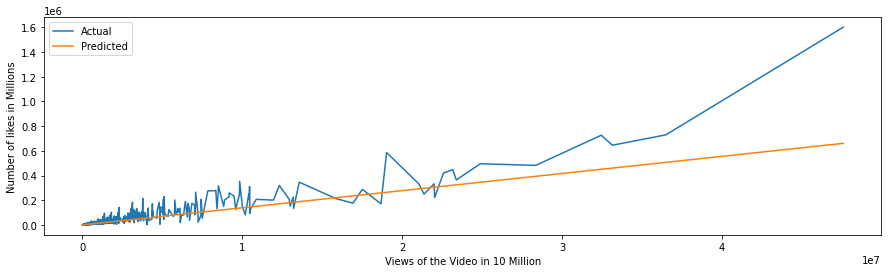

In [193]:
data = []

for i in df.values:
    
    data.append([i[2],i[3],i[10]])

    
df_ = pd.DataFrame(data, columns = ['views','likes','pred_likes'])

views  = list(df_.sort_values(by = 'views')['views'])
likes  = list(df_.sort_values(by = 'views')['likes'])
likes_ = list(df_.sort_values(by = 'views')['pred_likes'])

fig, ax = plt.subplots(figsize = (15,4))

plt.plot(views,likes , label = 'Actual')
plt.plot(views,likes_, label = 'Predicted')

plt.legend()

plt.xlabel('Views of the Video in 10 Million')
plt.ylabel('Number of likes in Millions')

plt.show()

In [173]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,view_to_like,pred_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706,711
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387,355
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954,297
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.02632,50105
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.02610,61148
